In [1]:
# Biblioteca para baixar arquivos do Google Drive
!pip install gdown


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Instalação das bibliotecas caso esteja usando jupyter
!pip install pandas seaborn numpy scikit-learn keras tensorflow


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os, gdown

csv_file = 'card_transdata.csv'

if not os.path.exists(csv_file):
    # Baixa o arquivo do Google Drive
    gdown.download(id='1mvP2vd-c1jpzQsRdgeOVOfbAm804DEMM', output=csv_file)
else:
    print(f'Arquivo {csv_file} já se encontra nesta sessão do colab')

Downloading...
From: https://drive.google.com/uc?id=1mvP2vd-c1jpzQsRdgeOVOfbAm804DEMM
To: C:\Users\julio\Downloads\ia\project\card_transdata.csv
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 76.3M/76.3M [00:09<00:00, 7.69MB/s]


In [4]:
import pandas as pd
#import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

C:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [5]:
dataframe = pd.read_csv(csv_file)

In [6]:
# Coletar os valores absolutos e percentuais de transações fraudulentas 

number_of_fraud = len(dataframe[dataframe['fraud'] == 1])
number_of_not_fraud = len(dataframe[dataframe['fraud'] == 0])

print(f'Número de transações [COM] fraude: {number_of_fraud}')
print(f'Número de transações [SEM] fraude: {number_of_not_fraud}')

print(f'Porcentagem de transações com fraude: {number_of_fraud / len(dataframe) * 100}%')

Número de transações [COM] fraude: 87403
Número de transações [SEM] fraude: 912597
Porcentagem de transações com fraude: 8.7403%


In [7]:
# Método padrão de correlação: Pearson

dataframe_pearson_corr = dataframe.corr()
dataframe_pearson_corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


<Axes: >

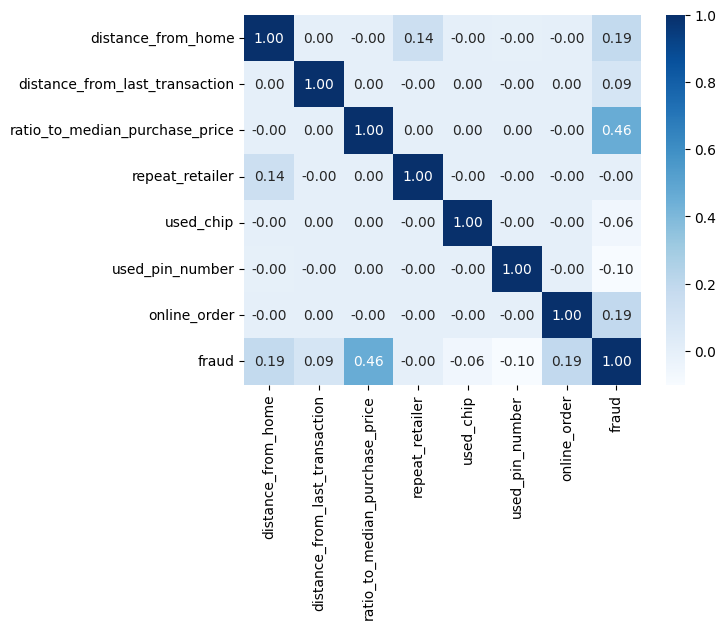

In [8]:
# Mapa de calor da correlação de Pearson

sns.heatmap(dataframe_pearson_corr, xticklabels = dataframe_pearson_corr.columns, yticklabels = dataframe_pearson_corr.columns, annot = True, fmt=".2f",cmap = "Blues")

In [9]:
# Método de correlação: Spearman

dataframe_spearman_corr = dataframe.corr(method='spearman')
dataframe_spearman_corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.001068,-0.000152,0.559724,-0.000118,-0.000338,-0.001812,0.095032
distance_from_last_transaction,-0.001068,1.000000,-0.000111,-0.001352,-0.000165,0.000555,-0.001076,0.034661
ratio_to_median_purchase_price,-0.000152,-0.000111,1.000000,0.001202,-0.000099,0.000251,-0.000376,0.342838
repeat_retailer,0.559724,-0.001352,0.001202,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000118,-0.000165,-0.000099,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.000338,0.000555,0.000251,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001812,-0.001076,-0.000376,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.095032,0.034661,0.342838,-0.001357,-0.060975,-0.100293,0.191973,1.000000


<Axes: >

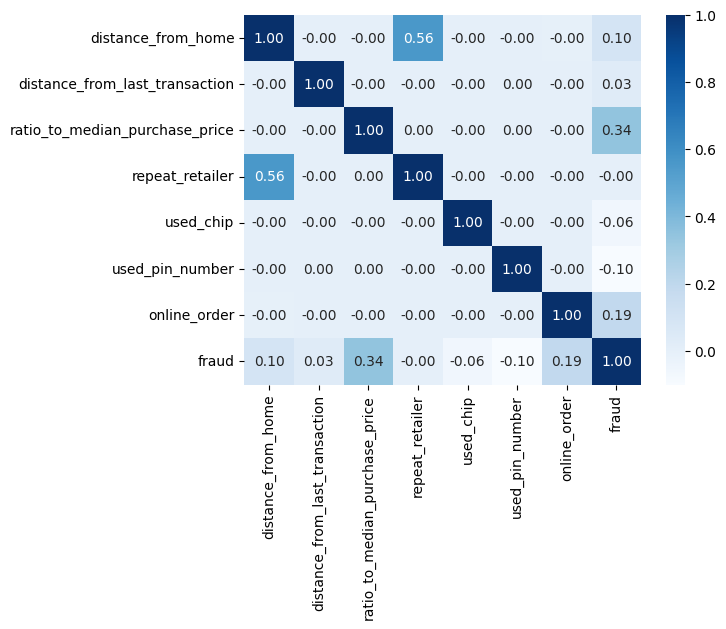

In [10]:
# Mapa de calor da correlação de Spearman

sns.heatmap(dataframe_spearman_corr, xticklabels = dataframe_spearman_corr.columns, yticklabels = dataframe_spearman_corr.columns, annot = True, fmt=".2f",cmap = "Blues")

### Vamos limpar os dados, utilizando somente as variáveis com maior correlação em relação a fraude

#### Variáveis a serem utilizadas:
* * - 1º lugar em ambas as análises
* online_order - 2º lugar em ambas as análises
* distance_from_home - 3º lugar via "Pearson" e 4º via "Spearman"
* used_pin_number - 4º lugar via "Pearson" e 3º via "Spearman"

#### Variáveis descartadas:
* used_chip - além da correlação não ser das maiores, vimos que muitas linhas possuíam, ao mesmo tempo, a condição "TRUE" de venda online ("online_order") e uso do chip ("used_chip"), o que não faz muito sentido
* repeat_retailer - correlação mais baixa de todas
* distance_from_last_transaction - segunda mais baixa correlação

In [12]:
# Dataframe sem as colunas used_chip, repeat_retailer e distance_from_last_transaction:

dataframe_droppado = dataframe.drop(['used_chip', 'repeat_retailer', 'distance_from_last_transaction'], axis=1)

In [13]:
X = np.array(dataframe_droppado.drop(columns='fraud'))
Y = to_categorical(np.array(dataframe['fraud']))

In [14]:
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [16]:
modelo = Sequential()

# Adição de mais neurônios

modelo.add(Dense(60, input_dim=4, activation='relu'))
modelo.add(Dense(50, activation='relu'))
modelo.add(Dense(40, activation='relu'))
modelo.add(Dense(30, activation='relu'))
modelo.add(Dense(20, activation='relu'))
modelo.add(Dense(10, activation='relu'))
modelo.add(Dense(2, activation='softmax'))

C:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# # Otimizador SGD
# from keras.optimizers import SGD
# modelo.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy']) # momentum=0.9

# # Otimizador AdaDelta
# from keras.optimizers import Adadelta
# modelo.compile(loss='categorical_crossentropy', optimizer=Adadelta(learning_rate=1.0), metrics=['accuracy'])

# # Otimizador RMSprop
# from keras.optimizers import RMSprop
# modelo.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

# # Otimizador AdaGrad
# from keras.optimizers import Adagrad
# modelo.compile(loss='categorical_crossentropy', optimizer=Adagrad(learning_rate=0.01), metrics=['accuracy'])

# Usando Adam no lugar de SGD: [AdamW] também é uma boa escolha para o proj.
from keras.optimizers import Adam
modelo.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

modelo.fit(X_train, y_train, epochs=100, batch_size=1000)

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9629 - loss: 0.1229
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9757 - loss: 0.0693
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9778 - loss: 0.0650
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9787 - loss: 0.0626
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9793 - loss: 0.0618
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9797 - loss: 0.0608
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9797 - loss: 0.0608
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9799 - loss: 0.0597
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9804 - loss: 0.0594
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9801 - loss: 0.0595
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9803 - loss: 0.0589
Epoch 12/100
700/700 ━━━━━━━━━━━━━━━━━━━━

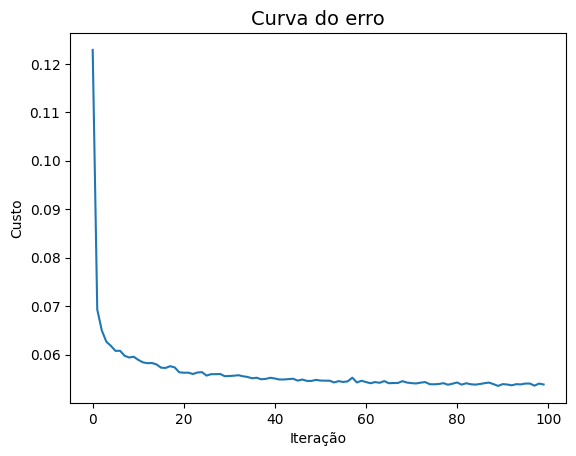

In [18]:
plt.plot(modelo.history.history['loss'])
plt.title("Curva do erro", fontsize=14)
plt.xlabel('Iteração')
plt.ylabel('Custo')
plt.show()

In [19]:
predicoes = modelo.predict(X_test)

9375/9375 ━━━━━━━━━━━━━━━━━━━━ 8s 899us/step


In [20]:
classes_previstas = np.argmax(predicoes, axis=1)
classes_reais = np.argmax(y_test, axis=1)

In [21]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(classes_reais, classes_previstas , normalize='pred')
print(cf_matrix)

[[0.99302913 0.12599192]
 [0.00697087 0.87400808]]


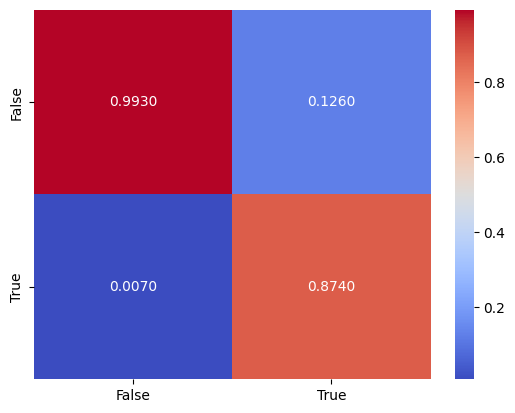

In [22]:
false_true = ['False', 'True']
sns.heatmap(cf_matrix, annot=True, fmt='.4f', cmap='coolwarm', xticklabels=false_true, yticklabels=false_true)
plt.show()